In [1]:
# IMPORTS

import os
import sys
import string
import requests

from IPython.display import HTML
from ipywidgets import interact

In [2]:
# CREATE CLASS

class Node(object):
    
    def __init__(N, char: str):
        N.value = char
        N.children = []
        N.end_word = False

In [3]:
# INSERT FUNCTION

def insert(root, word: str):

     # Set node equal to root
    node = root

    # Iterate through given word
    for c in word:

        # Keep track of whether or not character is found in children
        in_children = False

        # Set in_children to false if c is not in children nodes
        for child in node.children:

            # If character is in children, point node to child
            if child.value == c:
                node = child
                in_children = True
                break

        # If character is NOT in children, add a new child
        if not in_children:
            next_node = Node(c)
            node.children.append(next_node)
            node = next_node

    # Mark last character as leaf node
    node.end_word = True

In [4]:
# SEARCH FUNCTION

def search(root, word: str):

    # Set node equal to root
    node = root

    # Check if root has no children
    if not root.children:
        return False

    # Iterate through given word
    for c in word:

        # Keep track of whether or not character is found
        in_children = False

        for child in node.children:

            # If character is found in existing child, set char_found to True
            if child.value == c:
                in_children = True
                node = child
                break

        # If character is not found, return False
        if not in_children:
            return False

    # If not return before, the word has been found; return True
    if node.end_word:
        return True
    else:
        return False

In [26]:
# READ DICTIONARY

# Open file
dict_file = open("words.txt", "r")
dict_text = dict_file.read()
dict_file.close()

# Split words
dictionary = dict_text.split()

# Read dictionary into trie
root = Node('*')
    
for word in dictionary:
    insert(root, word)

In [20]:
# READ TXT FILES

# Create compilation of movie titles
scripts = ["shrek", "finding_nemo", "the_kings_speech", "the_imitation_game", "grown_ups", "white_chicks", "star_wars", "the_martian"]
scripts = [title + ".txt" for title in scripts]

punctuation = "!#$%&()*+,./:;<=>?@[\]^_`{|}~"

# Create dictionary for plotting
data = {}

# Open each file
for title in scripts:
    
    # Initialize values
    found_words = 0
    
    # Load text
    file = open(title, "r")
    text = file.read()
    file.close()
    
    # Split words
    words = text.split()
    
    # Remove punctuation and make lowercase
    table = str.maketrans('', '', punctuation)
    words = [w.translate(table) for w in words]
    words = [w.lower() for w in words]
    
    # Make list unique
    words = list(set(words))
    
    # Search using imported dictionary
    for word in words:
        if search(root, word):
            found_words += 1
    
    # Insert into dictionary
    data[title] = found_words
    
print(data)

{'shrek.txt': 1119, 'finding_nemo.txt': 1242, 'the_kings_speech.txt': 1810, 'the_imitation_game.txt': 1649, 'grown_ups.txt': 1495, 'white_chicks.txt': 1462, 'star_wars.txt': 1542, 'the_martian.txt': 1756}


In [23]:
import matplotlib.pyplot as plt

def plot_scripts(data):
    fig, ax = plt.subplots(1,1,figsize=(18, 8))
    movies = data.keys()
    words = data.values()
    ax.bar(movies, words, color = 'b')
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.show()

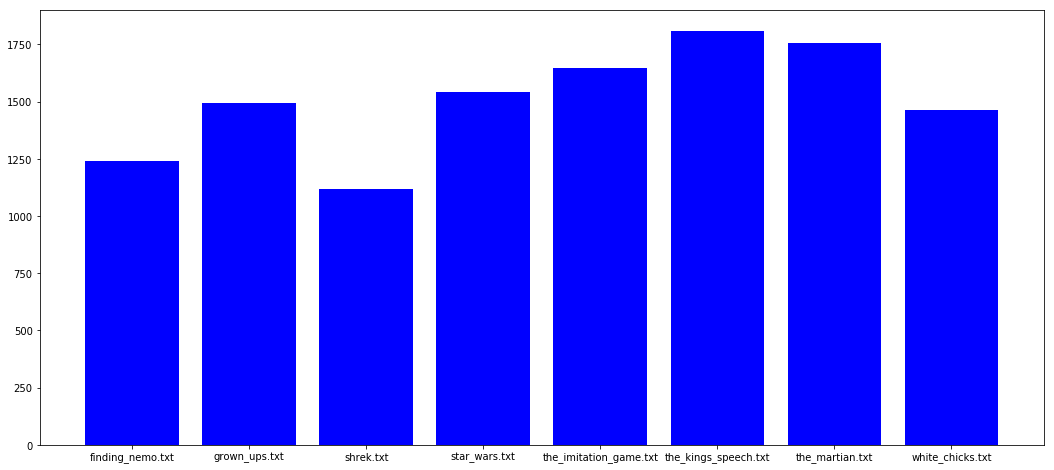

In [24]:
plot_scripts(data)